# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
from numpy import log, exp, sqrt
import math

In [2]:
def Config(xSA,ySA,xGA,yGA):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2,figsize=(13,7.4))
    font = FontProperties()
    font.set_name('Times New Roman')

    ax0.plot(xSA,ySA,'-',color='black',linewidth=0.5,zorder=1) #lightseagreen
    ax0.plot(xSA,ySA,'o',color='crimson',markersize=8,zorder=2)
    ax0.plot(xSA[0],ySA[0],'D',color='coral',alpha=1,markersize=12,label='1th city') #limegreen
    ax0.set_ylabel('y', fontproperties=font)
    ax0.set_xlabel('\nx', fontproperties=font)
    ax0.set_title('\nBest Path\nSIMULATED ANNEALING\n\n', color='C1', fontsize=15)
    legend = ax0.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0.,fontsize='x-large')
    ax0.grid(alpha=0.3)
    
    ax1.plot(xGA,yGA,'-',color='black',linewidth=0.5,zorder=2) #lightcoral
    ax1.plot(xGA,yGA,'o',color='royalblue',markersize=8,zorder=3)
    ax1.plot(xGA[0],yGA[0],'D',color='lightseagreen',alpha=1,markersize=12,label='1th city',zorder=4) #orange
    ax1.set_ylabel('\ny', fontproperties=font)
    ax1.set_xlabel('\nx', fontproperties=font)
    ax1.set_title('\nBest Path\nGENETIC ALGORITHM\n\n', color='C0', fontsize=15)
    legend = ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0.,fontsize='x-large')
    ax1.grid(alpha=0.3)

    fig.tight_layout()
    plt.show()

In [3]:
def PlotPaths(L_SA,L_GA):
    plt.figure(figsize=(13,7))
    font = FontProperties()
    font.set_name('Times New Roman')
    plt.plot(L_SA,color='darkorange',label='$L^{(1)}$ Simulated Annealing')
    plt.plot(L_GA,color='royalblue',label='$L^{(1)}$ Genetic Algorithm')
    plt.ylabel('$L^{(1)}$\n', fontproperties=font)
    plt.xlabel('\n# iterations\n', fontproperties=font)
    plt.title('\n\nComparison between $L^{(1)}$ of SA best path and the $L^{(1)}$ of GA best path\n\n\n', color='black', fontsize=15)
    legend = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.,fontsize='x-large')
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()

### Exercise 10.1

By adapting your Genetic Algorithm (GA) code, developed during the Numerical Exercise 9, write a C++ code to solve the TSP with a **Simulated Annealing** (SA) algorithm. Apply your code to the optimization of a path among 

- 32 cities randomly placed on a circumference
- 32 cities randomly placed inside a square

Show your results via:

- a picture of the length of the best path as a function of the iteration of your algorithm
- a picture of the best path

and compare your SA results with those obtained with GA in the previosu numerical exercise.
<br><br>

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Il codice del SA si trova nella cartella <font face="Courier">/Lecture10/SA_TSP</font>.
    </p>
    
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Per eseguire il <b>Simulated Annealing</b> parto dalla temperatura fittizia $T_0=1$ e la faccio decrescere lentamente impostando un $\delta T=0.005$. Per decidere da quale temperatura partire ho osservato i dati del percorso migliore in funzione delle iterazioni del GA, valutando quale fosse il $\Delta L_{max}^{(1)}$ tra un'iterazione e la successiva; ho deciso di impostare una temperatura iniziale $T_0 \geq \Delta L_{max}^{(1)}$ (considerando uguali a $1$ eventuali costanti atte a uniformare le unità di misura). In questo modo grantisco che l'accettazione dell'algoritmo sia alta per $T$ alte, in modo da poter sondare ogni zona della funzione $L^{(1)}$ da minimizzare.<br> Ad ogni temperatura dell'annealing l'algoritmo esegue un ciclo for di $100$ iterazioni, in ognuna delle quali vengono scelti due cromosomi secondo la distribuzione $int(N\times r^p)$, dove $N$ è il numero di città; da essi vengono generati due figli uguali, su cui possono avvenire alcune mutazioni con probabilità $p^{(i)}_m < 10\%$ e un crossover con $p^{(i)}_c > 50\%$. Calcolando poi la somma delle funzioni di costo dei due figli e quella dei due cromosomi di coda della popolazione (ovvero quelli con $L$ peggiore), tramite una mossa Metropolis l'algoritmo valuta se sostituire i  figli ai due cromosomi di coda della popolazione: genera un numero random $r\in(0,1)$ e, se $r\leq\frac{p_{figli}}{p_{coda}}=\frac{e^{-\frac{1}{T}L_{figli}}}{e^{-\frac{1}{T}L_{coda}}}$ accetta la mossa, altrimenti la rifiuta. Il campionamento di $T(figli|coda)$ del Metropolis è uniforme.
    </p>
<br>

### <font face = "Tahoma" style="color:teal"><b>32 cities randomly placed on a circumference</b></font>

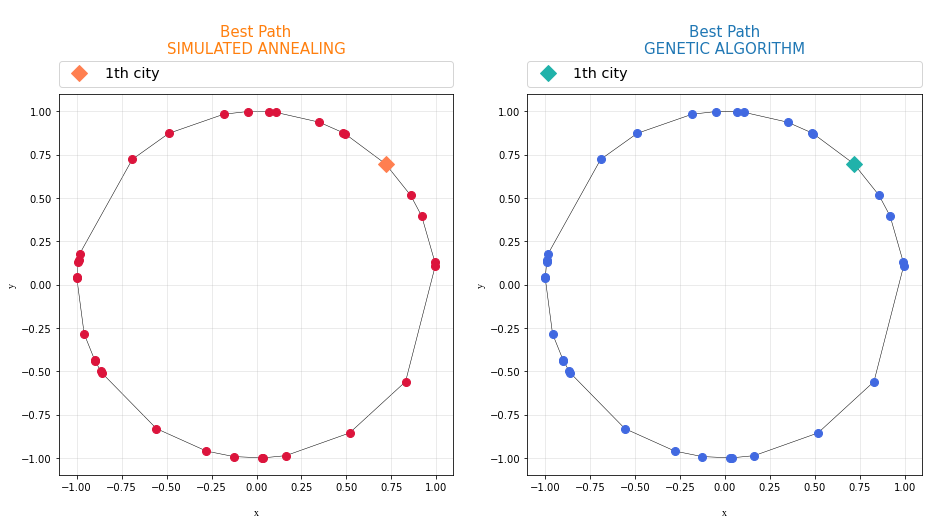

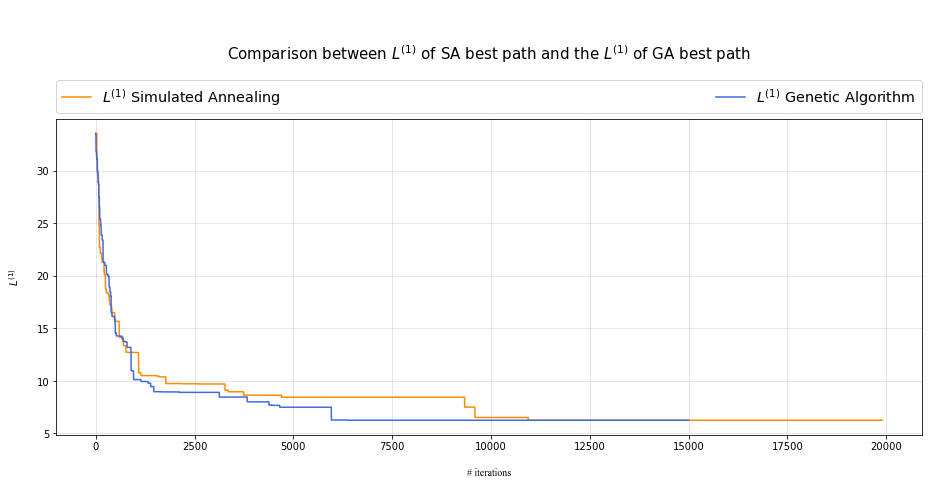

In [4]:
x_c = np.loadtxt(fname='Lecture10/Circle/best_path.dat',usecols=0)
y_c = np.loadtxt(fname='Lecture10/Circle/best_path.dat',usecols=1)
x_c_GA = np.loadtxt(fname='Lecture09/Circle/best_path.dat',usecols=0)
y_c_GA = np.loadtxt(fname='Lecture09/Circle/best_path.dat',usecols=1)
L_c = np.loadtxt(fname='Lecture10/Circle/best_L.dat')
L_c_GA = np.loadtxt(fname='Lecture09/Circle/best_L.dat')
Config(x_c,y_c,x_c_GA,y_c_GA)
PlotPaths(L_c,L_c_GA)

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Nel caso delle città disposte su una circonferenza, il GA arriva alla soluzione in $6000$ iterazioni, contro le $11000$ del SA. Per entrambi gli algoritmi il miglior percorso converge al valore $L^{(1)}=6.2403$, che è un buon risultato: mi aspettavo che fosse minore della circonferenza $C=2\pi r=2\pi$, dove $r=1$, e in effetti risulta che $L^{(1)} < C$. Il percorso raggiunto è candidato ad essere quello migliore in assoluto e quindi il minimo assoluto della funzione di costo.
    </p>
<br>

### <font face = "Tahoma" style="color:teal"><b>32 cities randomly placed inside a square</b></font>

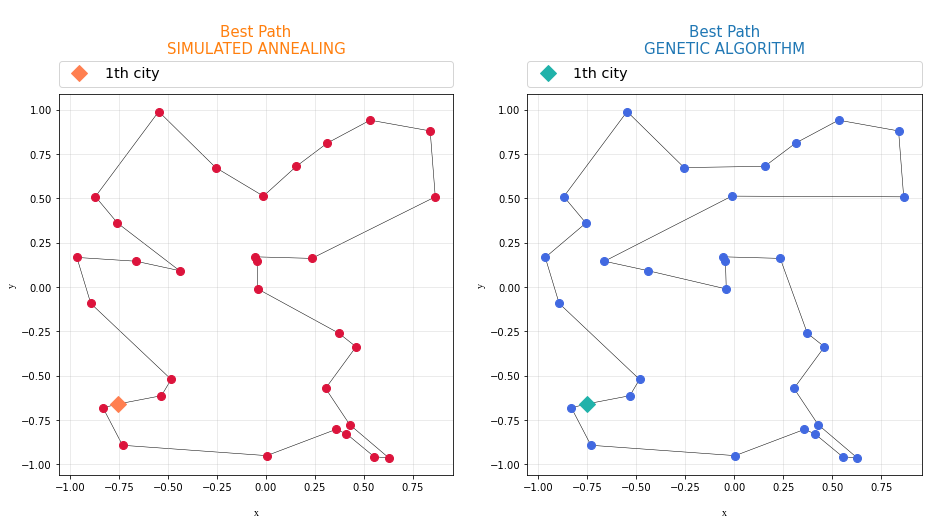

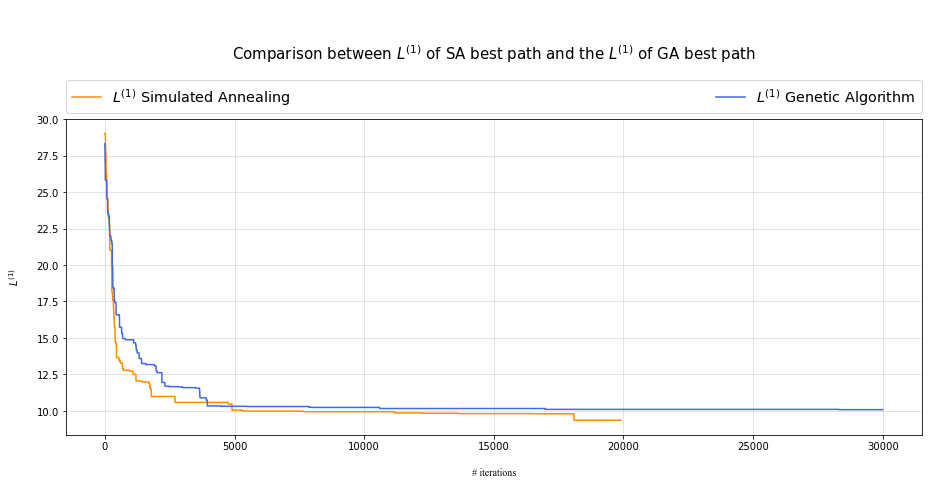

In [5]:
x_s = np.loadtxt(fname='Lecture10/Square/best_path.dat',usecols=0)
y_s = np.loadtxt(fname='Lecture10/Square/best_path.dat',usecols=1)
x_s_GA = np.loadtxt(fname='Lecture09/Square2/best_path.dat',usecols=0)
y_s_GA = np.loadtxt(fname='Lecture09/Square2/best_path.dat',usecols=1)
L_s = np.loadtxt(fname='Lecture10/Square/best_L.dat')
L_s_GA = np.loadtxt(fname='Lecture09/Square2/best_L.dat')
Config(x_s,y_s,x_s_GA,y_s_GA)
PlotPaths(L_s,L_s_GA)

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Nel caso delle città disposte in un quadrato, il SA è molto più veloce rispetto al GA. Come si nota dal grafico degli $L^{(1)}$ a confronto, ho provato a estendere la simulazione del GA a $30000$ iterazioni, ma il minimo di $L$ non viene ancora trovato. Per il SA ne bastano $18000$ per raggiungere un percorso nettamente migliore.
    </p>
<br>